In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
data = pd.read_csv('bai1_energy_usage.csv')
print(data.head())

   Dien_nang_tieu_thu_kWh  Nhiet_do_moi_truong_C  Thoi_gian_trong_ngay_h
0                4.058131              22.872710                      22
1                9.531786              24.468713                       3
2                7.453942              32.090948                      17
3                6.187256              21.800088                       4
4                1.982177              32.392994                      15


In [9]:
#normalize data
dntt_mean = data['Dien_nang_tieu_thu_kWh'].mean()
ndmt_mean = data['Nhiet_do_moi_truong_C'].mean()
tgtn_mean = data['Thoi_gian_trong_ngay_h'].mean()

num_sample = data.shape[0]
dntt_total = 0
ndmt_total = 0
tgtn_total = 0
for i in range(num_sample):
    dntt_total += (data.at[i, 'Dien_nang_tieu_thu_kWh'] - dntt_mean) **  2
    ndmt_total += (data.at[i, 'Nhiet_do_moi_truong_C'] - ndmt_mean) ** 2
    tgtn_total += (data.at[i, 'Thoi_gian_trong_ngay_h'] - tgtn_mean) ** 2

dntt_std = np.sqrt(dntt_total / num_sample)
ndmt_std = np.sqrt(ndmt_total / num_sample)
tgtn_std = np.sqrt(tgtn_total / num_sample)

# print(f"Dien_nang_tieu_thu_kWh std: {dntt_std:.2f}")
# print(f"Nhiet_do_moi_truong_C std: {ndmt_std:.2f}")
# print(f"Thoi_gian_trong_ngay_h std: {tgtn_std:.2f}")

dntt_normalized = (data['Dien_nang_tieu_thu_kWh'] - dntt_mean) / dntt_std
ndmt_normalized = (data['Nhiet_do_moi_truong_C'] - ndmt_mean) / ndmt_std
tgtn_normalized = (data['Thoi_gian_trong_ngay_h'] - tgtn_mean) / tgtn_std

data['Dien_nang_tieu_thu_kWh_normalized'] = dntt_normalized
data['Nhiet_do_moi_truong_C_normalized'] = ndmt_normalized
data['Thoi_gian_trong_ngay_h_normalized'] = tgtn_normalized

print(data.head())

   Dien_nang_tieu_thu_kWh  Nhiet_do_moi_truong_C  Thoi_gian_trong_ngay_h  \
0                4.058131              22.872710                      22   
1                9.531786              24.468713                       3   
2                7.453942              32.090948                      17   
3                6.187256              21.800088                       4   
4                1.982177              32.392994                      15   

   Dien_nang_tieu_thu_kWh_normalized  Nhiet_do_moi_truong_C_normalized  \
0                          -0.422272                         -0.342632   
1                           1.567248                         -0.063208   
2                           0.812010                          1.271273   
3                           0.351605                         -0.530424   
4                          -1.176823                          1.324154   

   Thoi_gian_trong_ngay_h_normalized  
0                           1.475909  
1                   

/tmp/ipykernel_29234/2607355522.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data['Dien_nang_tieu_thu_kWh_normalized'], data['Nhiet_do_moi_truong_C_normalized'], data['Thoi_gian_trong_ngay_h_normalized'], cmap='viridis')


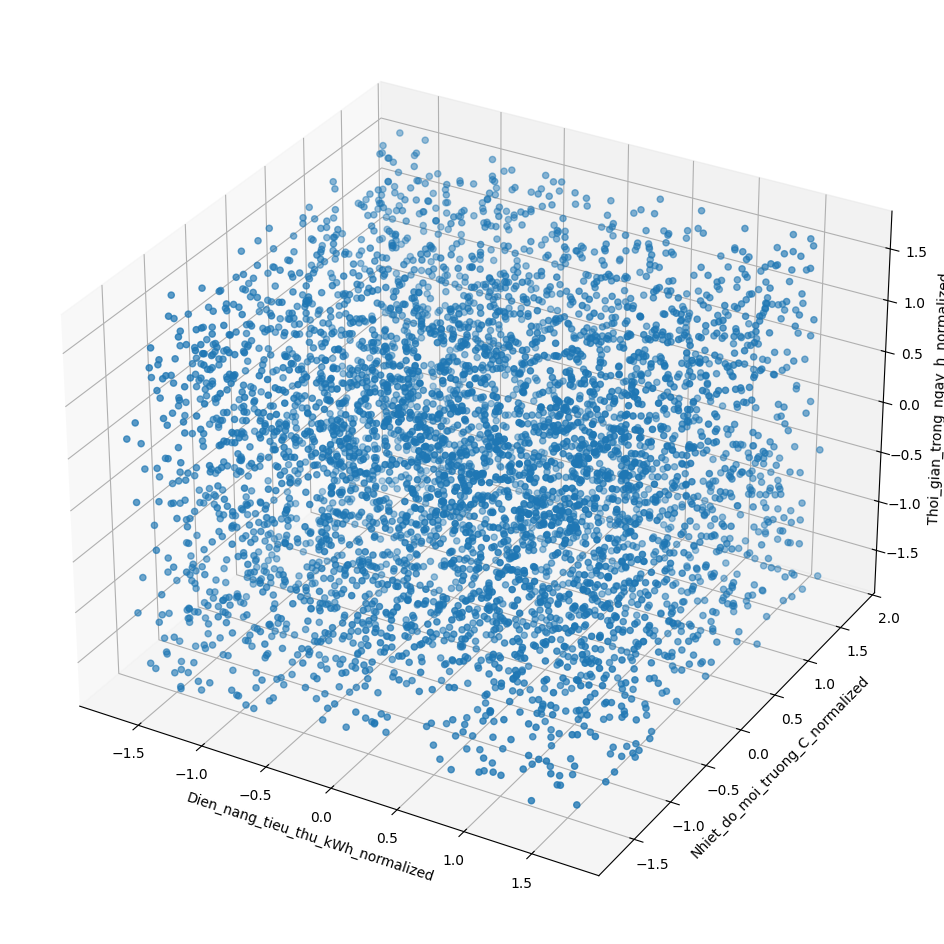

In [44]:
def plot_3d(data, plot_mode = 'normalize'):
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111, projection='3d')
    if plot_mode == 'normalize':
        ax.scatter(data['Dien_nang_tieu_thu_kWh_normalized'], data['Nhiet_do_moi_truong_C_normalized'], data['Thoi_gian_trong_ngay_h_normalized'], cmap='viridis')
        ax.set_xlabel('Dien_nang_tieu_thu_kWh_normalized')
        ax.set_ylabel('Nhiet_do_moi_truong_C_normalized')
        ax.set_zlabel('Thoi_gian_trong_ngay_h_normalized')
    elif plot_mode == 'raw':
        ax.scatter(data['Dien_nang_tieu_thu_kWh'], data['Nhiet_do_moi_truong_C'], data['Thoi_gian_trong_ngay_h'], cmap='viridis')
        ax.set_xlabel('Dien_nang_tieu_thu_kWh')
        ax.set_ylabel('Nhiet_do_moi_truong_C')
        ax.set_zlabel('Thoi_gian_trong_ngay_h')

    plt.show()
plot_3d(data)

/tmp/ipykernel_29234/2607355522.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data['Dien_nang_tieu_thu_kWh'], data['Nhiet_do_moi_truong_C'], data['Thoi_gian_trong_ngay_h'], cmap='viridis')


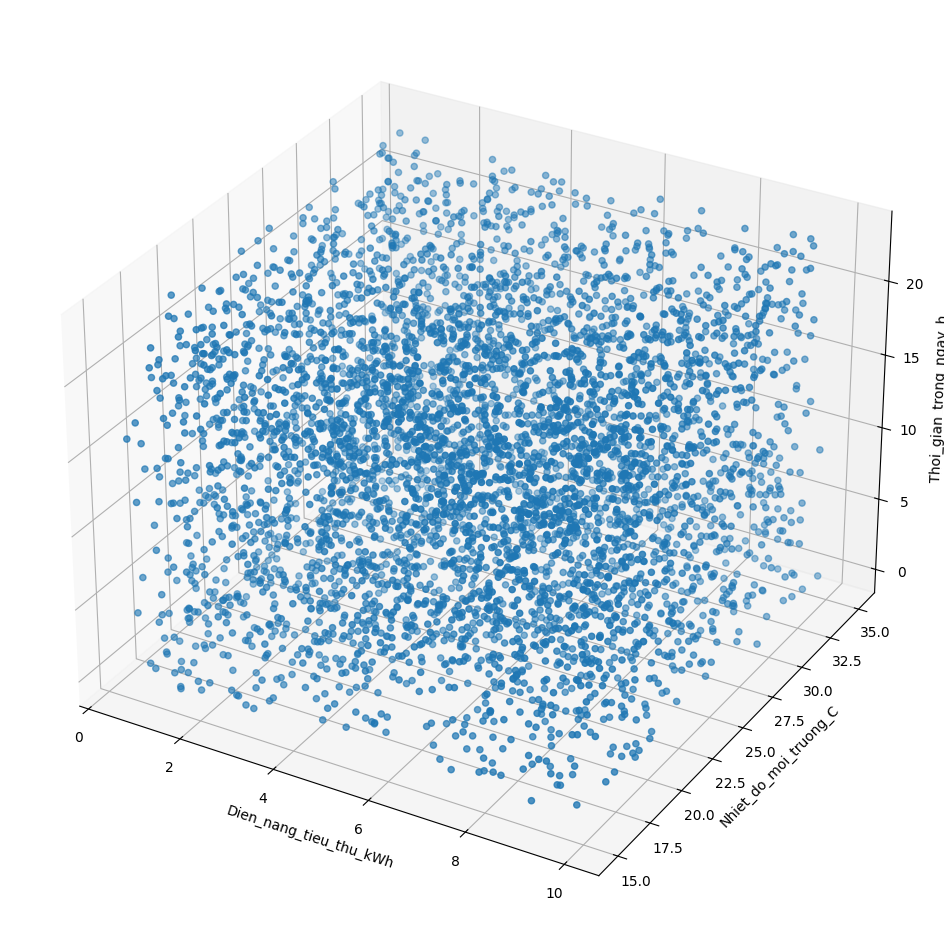

In [45]:
plot_3d(data, plot_mode='raw')

In [21]:
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    clusters = []
    for i in range(data.shape[0]):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        clusters.append(np.argmin(distances))
    return np.array(clusters)

def update_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        cluster_data = data[clusters == i]
        if len(cluster_data) == 0:
            # Nếu cụm không có điểm nào, chọn lại centroid ngẫu nhiên
            centroid = data[np.random.choice(data.shape[0])]
        else:
            centroid = np.mean(cluster_data, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

def kmeans(data, k):
    centroids = initialize_centroids(data, k)
    clusters = assign_clusters(data, centroids)
    while True:
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        clusters = assign_clusters(data, centroids)
    return centroids, clusters


def plot_kmean(data, clusters):
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Tạo scatter plot với màu sắc dựa trên cụm (clusters)
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=clusters, cmap='viridis')

    # Tạo legend dựa trên các nhóm
    legend_labels = ['Nhom A', 'Nhom B', 'Nhom C']
    unique_clusters = np.unique(clusters)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    # Sử dụng màu sắc từ colormap viridis
    handles = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='', markersize=10) for i in range(len(unique_clusters))]
    ax.legend(handles, legend_labels, title='Cụm')

    ax.set_xlabel('Dien_nang_tieu_thu_kWh_normalized')
    ax.set_ylabel('Nhiet_do_moi_truong_C_normalized')
    ax.set_zlabel('Thoi_gian_trong_ngay_h_normalized')
    
    plt.show()



# Test
data_array = data[['Dien_nang_tieu_thu_kWh_normalized', 'Nhiet_do_moi_truong_C_normalized', 'Thoi_gian_trong_ngay_h_normalized']].values
centroids, clusters = kmeans(data_array, 3)



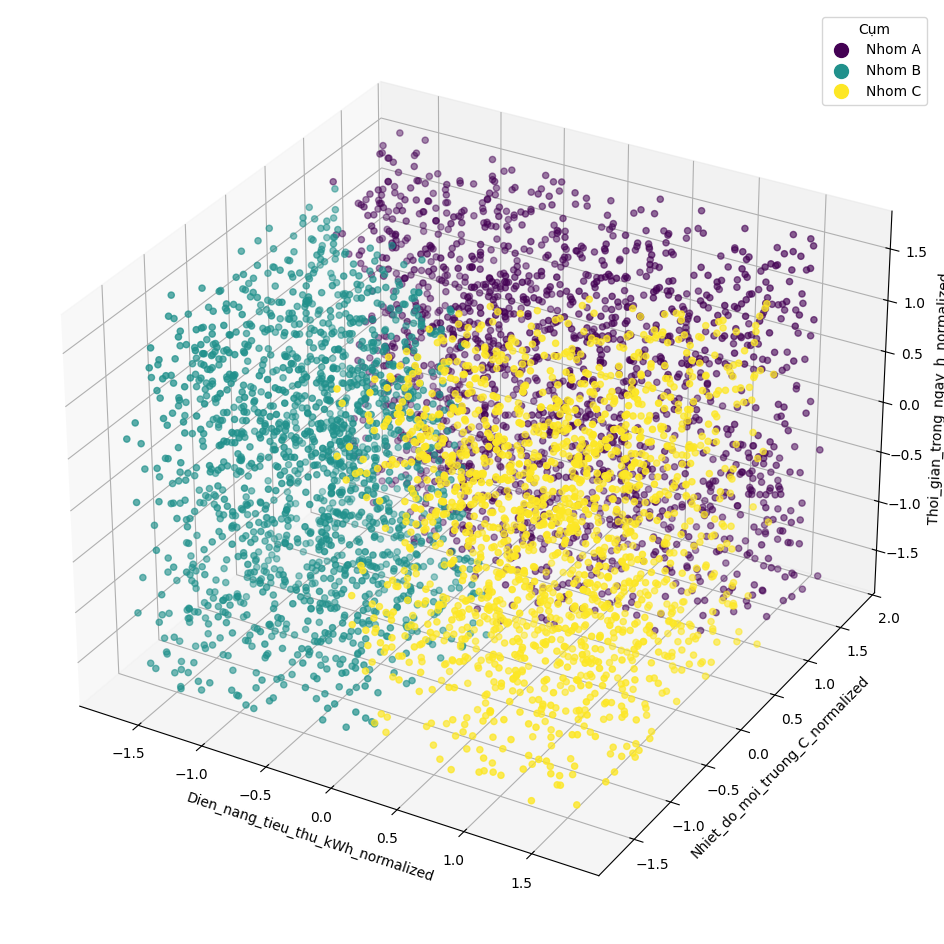

In [22]:
plot_kmean(data_array, clusters)


Cụm: Nhom A
Khoang thoi gian tieu thu dien nang cao tu: 0.0h den 23.0h


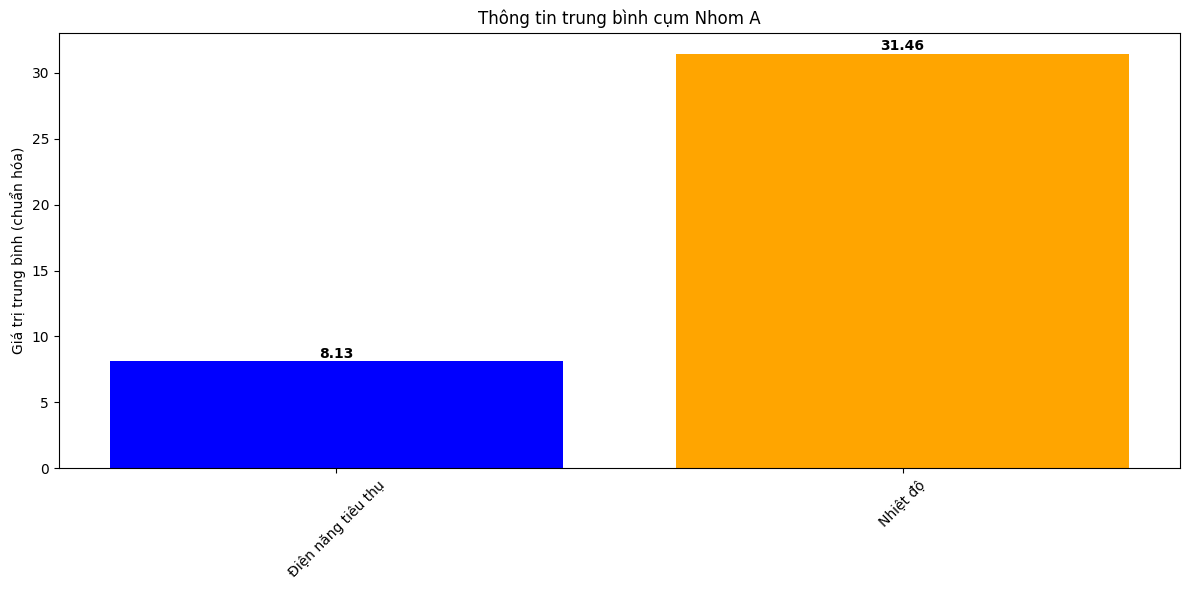


Cụm: Nhom B
Không có dữ liệu tiêu thụ điện năng cao.

Cụm: Nhom C
Khoang thoi gian tieu thu dien nang cao tu: 0.0h den 23.0h


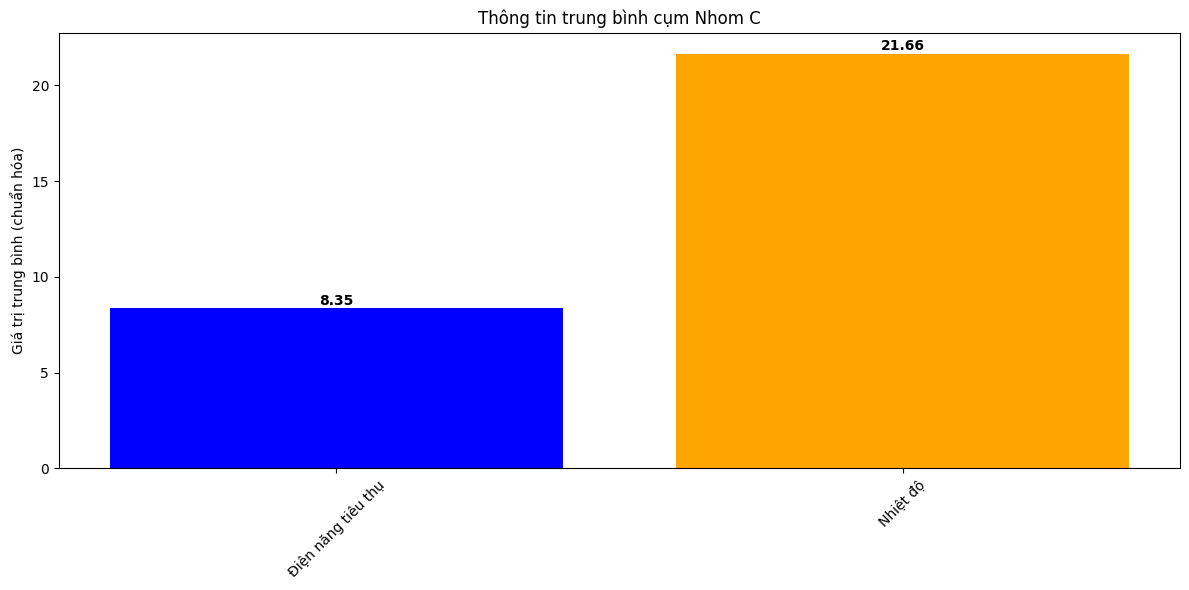

In [46]:
def print_high_consumption_periods(data, clusters):
    cluster_labels = ['Nhom A', 'Nhom B', 'Nhom C']
    unique_clusters = np.unique(clusters)
    
    for cluster_id in unique_clusters:
        print(f"\nCụm: {cluster_labels[cluster_id]}")
        cluster_data = data[clusters == cluster_id]
        
        # Lọc dữ liệu có điện năng tiêu thụ > 0.5
        high_consumption = cluster_data[cluster_data[:, 0] > 0.5]

        if len(high_consumption) == 0:
            print("Không có dữ liệu tiêu thụ điện năng cao.")
            continue
        energy_buffer = np.array([])
        temp_buffer = np.array([])
        time_buffer = np.array([])

        for point in high_consumption:
            energy, temp, time = point
            energy = (energy * dntt_std) + dntt_mean
            temp = (temp * ndmt_std) + ndmt_mean
            time = (time * tgtn_std) + tgtn_mean
            energy_buffer = np.append(energy_buffer, energy)
            temp_buffer = np.append(temp_buffer, temp)
            time_buffer = np.append(time_buffer, time)
            
            # print(f"Điện năng tiêu thụ: {energy:.2f} | Nhiệt độ: {temp:.2f} | Thời gian trong ngày: {time:.2f}h")
        print(f"Khoang thoi gian tieu thu dien nang cao tu: {time_buffer.min()}h den {time_buffer.max()}h")
        # Biểu đồ
        fig, ax = plt.subplots(figsize=(12, 6))
        mean_energy = energy_buffer.mean()
        mean_temp = temp_buffer.mean()
        mean_time = time_buffer.mean()

        # Dữ liệu cho biểu đồ
        labels = ['Điện năng tiêu thụ', 'Nhiệt độ']
        values = [mean_energy, mean_temp]
        colors = ['blue', 'orange']

        # Tạo biểu đồ thanh
        bars = ax.bar(labels, values, color=colors)

        # Thêm giá trị lên đầu mỗi cột
        for bar, value in zip(bars, values):
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Vị trí ngang
                bar.get_height() + 0.02,             # Vị trí dọc
                f'{value:.2f}',                      # Giá trị hiển thị
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
            )

        ax.set_title(f'Thông tin trung bình cụm {cluster_labels[cluster_id]}')
        ax.set_ylabel('Giá trị trung bình (chuẩn hóa)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Test
print_high_consumption_periods(data_array, clusters)

## Phân tích biểu đồ và giải pháp tiết kiệm điện cho từng cụm:

    Cụm A (Màu tím):

        Đặc điểm: Đây là nhóm có mức tiêu thụ điện năng cao, tập trung chủ yếu vào các khu vực có nhiệt độ môi trường cao. Thời gian tiêu thụ điện trải đều trong suốt cả ngày. Điều này cho thấy các thiết bị làm mát và hệ thống điều hòa nhiệt độ đang hoạt động liên tục mà không có sự điều chỉnh hợp lý.

        Giải pháp tiết kiệm điện:

            Kiểm soát điều hòa: Cài đặt chế độ tiết kiệm năng lượng cho máy lạnh, điều chỉnh nhiệt độ phù hợp thay vì để nhiệt độ quá thấp.

            Cách nhiệt: Sử dụng rèm cửa cách nhiệt và lớp phủ chống nắng để giảm thiểu tác động từ nhiệt độ bên ngoài.

            Tắt thiết bị khi không sử dụng: Thiết lập hệ thống tự động ngắt thiết bị khi không có người sử dụng, đặc biệt vào ban đêm.

            Sử dụng quạt thay cho điều hòa: Khi nhiệt độ không quá cao, thay vì bật điều hòa, có thể sử dụng quạt để giảm thiểu mức tiêu thụ điện.

    Cụm B (Màu xanh lam):

        Đặc điểm: Đây là nhóm có xu hướng sử dụng điện hợp lý và tiết kiệm. Mức tiêu thụ điện năng được duy trì ở mức thấp và ổn định.

        Giải pháp duy trì tiết kiệm điện:

            Duy trì thói quen tiết kiệm: Khuyến khích người dùng tiếp tục duy trì thói quen tắt các thiết bị điện khi không cần thiết.

            Tăng cường sử dụng thiết bị tiết kiệm năng lượng: Cập nhật và sử dụng các thiết bị có nhãn năng lượng cao.

            Theo dõi và điều chỉnh: Sử dụng hệ thống giám sát năng lượng để tiếp tục theo dõi và điều chỉnh mức tiêu thụ điện năng, đặc biệt vào các khung giờ cao điểm.

    Cụm C (Màu vàng):

        Đặc điểm: Đây là nhóm có xu hướng tiêu thụ điện năng nhiều vào các khung giờ cao điểm (có thể là sáng sớm hoặc chiều tối) và nhiệt độ môi trường không quá cao. Điều này cho thấy các thiết bị điện gia dụng và thiết bị văn phòng đang hoạt động mạnh vào các thời điểm này.

        Giải pháp tiết kiệm điện:

            Phân bổ lại thời gian sử dụng thiết bị: Đối với các thiết bị có công suất cao như máy giặt, máy sấy, máy nước nóng, nên điều chỉnh thời gian sử dụng vào các khung giờ thấp điểm để giảm tải cho hệ thống điện.

            Sử dụng thiết bị có công suất thấp: Thay thế các thiết bị cũ tiêu hao nhiều điện năng bằng các thiết bị mới có công suất thấp và tính năng tiết kiệm năng lượng.

            Cài đặt hệ thống cảnh báo: Cảnh báo người dùng khi mức tiêu thụ điện vượt ngưỡng tiêu chuẩn để có biện pháp điều chỉnh kịp thời.